In [1]:
import geopandas as gpd
import requests
from sodapy import Socrata
import os
import pandas as pd
from shapely import wkt
from shapely.geometry import shape 
from shapely.ops import nearest_points
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import plotly.graph_objects as go

# Load

In [3]:
path = '/Users/Kahty/Location Research/data/ct_pluto09/ct_pluto09.shp'
ct_pluto09 = gpd.read_file(path)
path = '/Users/Kahty/Location Research/data/ct_pluto17/ct_pluto17.shp'
ct_pluto17 = gpd.read_file(path)

# Calculate 1：The Change of Retail Floor Area

In [85]:
ct_pluto09

OBJECTID CTLabel  BoroCode_l       BoroName  CT2010 BoroCT2010  \
0              1       9           5  Staten Island     900    5000900   
1              1       9           5  Staten Island     900    5000900   
2              1       9           5  Staten Island     900    5000900   
3              1       9           5  Staten Island     900    5000900   
4              1       9           5  Staten Island     900    5000900   
...          ...     ...         ...            ...     ...        ...   
855001      2165     159           1      Manhattan   15900    1015900   
855002      2165     159           1      Manhattan   15900    1015900   
855003      2165     159           1      Manhattan   15900    1015900   
855004      2165     159           1      Manhattan   15900    1015900   
855005      2165     159           1      Manhattan   15900    1015900   

       CDEligibil NTACode                                    NTAName  PUMA  \
0               E    SI22  West New Brighton-New Brighton-St. George  3903   
1               E    SI22  West New Brighton-New Brighton-St. George  3903   
2               E    SI22  West New Brighton-New Brighton-St. George  3903   
3               E    SI22  West New Brighton-New Brighton-St. George  3903   
4               E    SI22  West New Brighton-New Brighton-St. George  3903   
...           ...     ...                                        ...   ...   
855001          I    MN14                             Lincoln Square  3806   
855002          I    MN14                             Lincoln Square  3806   
855003          I    MN14                             Lincoln Square  3806   
855004          I    MN14                             Lincoln Square  3806   
855005          I    MN14                             Lincoln Square  3806   

        ...  EDesigNum  APPBBL  APPDate  PLUTOMapID Version  MAPPLUTO_F  \
0       ...       None     0.0     None           1    09v2           0   
1       ...       None     0.0     None           1    09v2           0   
2       ...       None     0.0     None           1    09v2           0   
3       ...       None     0.0     None           1    09v2           0   
4       ...       None     0.0     None           1    09v2           0   
...     ...        ...     ...      ...         ...     ...         ...   
855001  ...       None     0.0     None           1    09v2           0   
855002  ...       None     0.0     None           1    09v2           0   
855003  ...       None     0.0     None           1    09v2           0   
855004  ...       None     0.0     None           1    09v2           0   
855005  ...       None     0.0     None           1    09v2           0   

        SHAPE_Leng    SHAPE_Area pluto_year  \
0       299.220253   4391.514618       2009   
1       506.605994  11579.538069       2009   
2       294.257424   4508.207312       2009   
3       284.575061   4006.557065       2009   
4       292.244279   4403.899054       2009   
...            ...           ...        ...   
855001  255.563712   2266.237016       2009   
855002  230.198848   1732.884592       2009   
855003  251.792129   2065.386583       2009   
855004  225.533645   1503.532307       2009   
855005  252.011914   2077.117861       2009   

                                                 geometry  
0       POLYGON ((-74.07921 40.64344, -74.07914 40.643...  
1       POLYGON ((-74.07921 40.64344, -74.07914 40.643...  
2       POLYGON ((-74.07921 40.64344, -74.07914 40.643...  
3       POLYGON ((-74.07921 40.64344, -74.07914 40.643...  
4       POLYGON ((-74.07921 40.64344, -74.07914 40.643...  
...                                                   ...  
855001  POLYGON ((-73.98068 40.77993, -73.98114 40.779...  
855002  POLYGON ((-73.98068 40.77993, -73.98114 40.779...  
855003  POLYGON ((-73.98068 40.77993, -73.98114 40.779...  
855004  POLYGON ((-73.98068 40.77993, -73.98114 40.779...  
855005  POLYGON ((-73.98068 40.77993, -73.98114 40.779..

In [86]:
ct_pluto17

OBJECTID CTLabel  BoroCode_l       BoroName  CT2010_lef BoroCT2010  \
0              1       9           5  Staten Island         900    5000900   
1              1       9           5  Staten Island         900    5000900   
2              1       9           5  Staten Island         900    5000900   
3              1       9           5  Staten Island         900    5000900   
4              1       9           5  Staten Island         900    5000900   
...          ...     ...         ...            ...         ...        ...   
853177      2165     159           1      Manhattan       15900    1015900   
853178      2165     159           1      Manhattan       15900    1015900   
853179      2165     159           1      Manhattan       15900    1015900   
853180      2165     159           1      Manhattan       15900    1015900   
853181      2165     159           1      Manhattan       15900    1015900   

       CDEligibil NTACode                                    NTAName  PUMA  \
0               E    SI22  West New Brighton-New Brighton-St. George  3903   
1               E    SI22  West New Brighton-New Brighton-St. George  3903   
2               E    SI22  West New Brighton-New Brighton-St. George  3903   
3               E    SI22  West New Brighton-New Brighton-St. George  3903   
4               E    SI22  West New Brighton-New Brighton-St. George  3903   
...           ...     ...                                        ...   ...   
853177          I    MN14                             Lincoln Square  3806   
853178          I    MN14                             Lincoln Square  3806   
853179          I    MN14                             Lincoln Square  3806   
853180          I    MN14                             Lincoln Square  3806   
853181          I    MN14                             Lincoln Square  3806   

        ...  PLUTOMapID  FIRM07_FLA  PFIRM15_FL  Version MAPPLUTO_F  \
0       ...           1        None        None   17V1.1          0   
1       ...           1        None        None   17V1.1          0   
2       ...           1        None        None   17V1.1          0   
3       ...           1        None        None   17V1.1          0   
4       ...           1        None        None   17V1.1          0   
...     ...         ...         ...         ...      ...        ...   
853177  ...           1        None        None   17V1.1          0   
853178  ...           1        None        None   17V1.1          0   
853179  ...           1        None        None   17V1.1          0   
853180  ...           1        None        None   17V1.1          7   
853181  ...           1        None           1   17V1.1          0   

        SHAPE_Leng    SHAPE_Area  pluto_year  \
0       312.290638   5619.562639        2017   
1       272.751966   4097.426082        2017   
2       262.008098   4083.079567        2017   
3       361.061242   8051.616076        2017   
4       262.105786   4053.863689        2017   
...            ...           ...         ...   
853177  246.926214   1951.298804        2017   
853178  636.339129  20255.987152        2017   
853179  351.024291   7354.270457        2017   
853180  696.415663  30306.045865        2017   
853181  743.034880  22127.995137        2017   

                                                 geometry  c  
0       POLYGON ((-74.07921 40.64344, -74.07914 40.643...  0  
1       POLYGON ((-74.07921 40.64344, -74.07914 40.643...  0  
2       POLYGON ((-74.07921 40.64344, -74.07914 40.643...  0  
3       POLYGON ((-74.07921 40.64344, -74.07914 40.643...  0  
4       POLYGON ((-74.07921 40.64344, -74.07914 40.643...  0  
...                                                   ... ..  
853177  POLYGON ((-73.98068 40.77993, -73.98114 40.779...  0  
853178  POLYGON ((-73.98068 40.77993, -73.98114 40.779...  0  
853179  POLYGON ((-73.98068 40.77993, -73.98114 40.779...  0  
853180  POLYGON ((-73.98068 40.77993, -73.98114 40.779...  0  
853181  POL

In [87]:
retail09 = ct_pluto09[['GEOID', 'BldgArea', 'RetailArea','ResArea']].groupby('GEOID').sum()
retail09.head()

BldgArea  RetailArea  ResArea
GEOID                                     
36005000200   1639138       13110  1569593
36005000400   1676028       23530  1547867
36005001600   3749678       21142  2168880
36005001900   6914956      106713   632179
36005002000   2419793       59403  2184276

In [160]:
retail17 = ct_pluto17[['GEOID', 'BldgArea', 'RetailArea','ResArea']].groupby('GEOID').sum()
retail17 = retail17.rename(columns={'BldgArea': 'bldgarea'})
retail17 = retail17.rename(columns={'RetailArea': 'retailarea'})
retail17 = retail17.rename(columns={'ResArea': 'resarea'})
retail17

bldgarea  retailarea  resarea
GEOID                                     
36005000200   1644239       31474  1435603
36005000400   1889262       23845  1646493
36005001600   3665443       21142  2043998
36005001900   7828032      121430  1303422
36005002000   2645555       58689  2206602
...               ...         ...      ...
36085030301   2112442      154409  1809072
36085030302   2609980      246061  2107550
36085031901   1259087      256936   993523
36085031902   2220510       12634  1720693
36085032300   2065199      225969   453628

[2155 rows x 3 columns]

In [161]:
combined = retail17.merge(retail09, left_index=True, right_index=True)
combined

bldgarea  retailarea  resarea  BldgArea  RetailArea  ResArea
GEOID                                                                    
36005000200   1644239       31474  1435603   1639138       13110  1569593
36005000400   1889262       23845  1646493   1676028       23530  1547867
36005001600   3665443       21142  2043998   3749678       21142  2168880
36005001900   7828032      121430  1303422   6914956      106713   632179
36005002000   2645555       58689  2206602   2419793       59403  2184276
...               ...         ...      ...       ...         ...      ...
36085030301   2112442      154409  1809072   2169269      152956  1879874
36085030302   2609980      246061  2107550   2714280      238702  2297803
36085031901   1259087      256936   993523   1289101      258599  1023759
36085031902   2220510       12634  1720693   2168844       12302  1813176
36085032300   2065199      225969   453628   2139971      227080   435901

[2155 rows x 6 columns]

In [162]:
combined['retailarea_change'] = (combined['retailarea'] - combined['RetailArea'] ) / combined['RetailArea']*100
combined['retailarea_change'].loc[(combined['retailarea']>=0)&(combined['RetailArea']==0)] = float('nan')
combined

C:\Users\Kahty\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


bldgarea  retailarea  resarea  BldgArea  RetailArea  ResArea  \
GEOID                                                                       
36005000200   1644239       31474  1435603   1639138       13110  1569593   
36005000400   1889262       23845  1646493   1676028       23530  1547867   
36005001600   3665443       21142  2043998   3749678       21142  2168880   
36005001900   7828032      121430  1303422   6914956      106713   632179   
36005002000   2645555       58689  2206602   2419793       59403  2184276   
...               ...         ...      ...       ...         ...      ...   
36085030301   2112442      154409  1809072   2169269      152956  1879874   
36085030302   2609980      246061  2107550   2714280      238702  2297803   
36085031901   1259087      256936   993523   1289101      258599  1023759   
36085031902   2220510       12634  1720693   2168844       12302  1813176   
36085032300   2065199      225969   453628   2139971      227080   435901   

             retailarea_change  
GEOID                           
36005000200         140.076278  
36005000400           1.338717  
36005001600           0.000000  
36005001900          13.791197  
36005002000          -1.201959  
...                        ...  
36085030301           0.949946  
36085030302           3.082923  
36085031901          -0.643081  
36085031902           2.698748  
36085032300          -0.489255  

[2155 rows x 7 columns]

# C Zone

In [191]:
ct_pluto17

OBJECTID CTLabel  BoroCode_l       BoroName  CT2010_lef BoroCT2010  \
0              1       9           5  Staten Island         900    5000900   
1              1       9           5  Staten Island         900    5000900   
2              1       9           5  Staten Island         900    5000900   
3              1       9           5  Staten Island         900    5000900   
4              1       9           5  Staten Island         900    5000900   
...          ...     ...         ...            ...         ...        ...   
853177      2165     159           1      Manhattan       15900    1015900   
853178      2165     159           1      Manhattan       15900    1015900   
853179      2165     159           1      Manhattan       15900    1015900   
853180      2165     159           1      Manhattan       15900    1015900   
853181      2165     159           1      Manhattan       15900    1015900   

       CDEligibil NTACode                                    NTAName  PUMA  \
0               E    SI22  West New Brighton-New Brighton-St. George  3903   
1               E    SI22  West New Brighton-New Brighton-St. George  3903   
2               E    SI22  West New Brighton-New Brighton-St. George  3903   
3               E    SI22  West New Brighton-New Brighton-St. George  3903   
4               E    SI22  West New Brighton-New Brighton-St. George  3903   
...           ...     ...                                        ...   ...   
853177          I    MN14                             Lincoln Square  3806   
853178          I    MN14                             Lincoln Square  3806   
853179          I    MN14                             Lincoln Square  3806   
853180          I    MN14                             Lincoln Square  3806   
853181          I    MN14                             Lincoln Square  3806   

        ...  PLUTOMapID  FIRM07_FLA  PFIRM15_FL  Version MAPPLUTO_F  \
0       ...           1        None        None   17V1.1          0   
1       ...           1        None        None   17V1.1          0   
2       ...           1        None        None   17V1.1          0   
3       ...           1        None        None   17V1.1          0   
4       ...           1        None        None   17V1.1          0   
...     ...         ...         ...         ...      ...        ...   
853177  ...           1        None        None   17V1.1          0   
853178  ...           1        None        None   17V1.1          0   
853179  ...           1        None        None   17V1.1          0   
853180  ...           1        None        None   17V1.1          7   
853181  ...           1        None           1   17V1.1          0   

        SHAPE_Leng    SHAPE_Area  pluto_year  \
0       312.290638   5619.562639        2017   
1       272.751966   4097.426082        2017   
2       262.008098   4083.079567        2017   
3       361.061242   8051.616076        2017   
4       262.105786   4053.863689        2017   
...            ...           ...         ...   
853177  246.926214   1951.298804        2017   
853178  636.339129  20255.987152        2017   
853179  351.024291   7354.270457        2017   
853180  696.415663  30306.045865        2017   
853181  743.034880  22127.995137        2017   

                                                 geometry  c  
0       POLYGON ((-74.07921 40.64344, -74.07914 40.643...  0  
1       POLYGON ((-74.07921 40.64344, -74.07914 40.643...  0  
2       POLYGON ((-74.07921 40.64344, -74.07914 40.643...  0  
3       POLYGON ((-74.07921 40.64344, -74.07914 40.643...  0  
4       POLYGON ((-74.07921 40.64344, -74.07914 40.643...  0  
...                                                   ... ..  
853177  POLYGON ((-73.98068 40.77993, -73.98114 40.779...  0  
853178  POLYGON ((-73.98068 40.77993, -73.98114 40.779...  0  
853179  POLYGON ((-73.98068 40.77993, -73.98114 40.779...  0  
853180  POLYGON ((-73.98068 40.77993, -73.98114 40.779...  0  
853181  POL

In [192]:
ct_pluto17['c']=0
ct_pluto17['c'].loc[(ct_pluto17['ZoneDist1'].str.contains('C')==True) & (ct_pluto17['ZoneDist1'].str.contains('C8')==False) & (ct_pluto17['ZoneDist1'].str.contains('C7')==False)& (ct_pluto17['ZoneDist1'].str.contains('C8')==False) & (ct_pluto17['ZoneDist1'].str.contains('BPC')==False)]=1

C:\Users\Kahty\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [193]:
temp = ct_pluto17[['GEOID', 'c']].groupby('GEOID').sum()
cct = temp.reset_index()
cct

GEOID  c
0     36005000200  0
1     36005000400  0
2     36005001600  0
3     36005001900  0
4     36005002000  0
...           ... ..
2150  36085030301  0
2151  36085030302  0
2152  36085031901  2
2153  36085031902  0
2154  36085032300  0

[2155 rows x 2 columns]

In [194]:
#cct.to_csv('/Users/Kahty/Location Research/data/cct.csv', index = False)

In [184]:
combined

OBJECTID CTLabel  BoroCode   BoroName  CT2010 BoroCT2010 CDEligibil  \
0           2      98         1  Manhattan    9800    1009800          I   
1           3     102         1  Manhattan   10200    1010200          I   
2           4     104         1  Manhattan   10400    1010400          I   
3           5     113         1  Manhattan   11300    1011300          I   
4           6  114.02         1  Manhattan   11402    1011402          I   
..        ...     ...       ...        ...     ...        ...        ...   
484      2148     151         1  Manhattan   15100    1015100          I   
485      2161      48         1  Manhattan    4800    1004800          I   
486      2163  508.01         3   Brooklyn   50801    3050801          E   
487      2164     157         1  Manhattan   15700    1015700          I   
488      2165     159         1  Manhattan   15900    1015900          I   

    NTACode                        NTAName  PUMA  ...  \
0      MN19        Turtle Bay-East Midtown  3808  ...   
1      MN17          Midtown-Midtown South  3807  ...   
2      MN17          Midtown-Midtown South  3807  ...   
3      MN17          Midtown-Midtown South  3807  ...   
4      MN40  Upper East Side-Carnegie Hill  3805  ...   
..      ...                            ...   ...  ...   
484    MN14                 Lincoln Square  3806  ...   
485    MN21                       Gramercy  3808  ...   
486    BK42                       Flatbush  4015  ...   
487    MN14                 Lincoln Square  3806  ...   
488    MN14                 Lincoln Square  3806  ...   

                                              geometry  bldgarea  retailarea  \
0    POLYGON ((-73.96433 40.75639, -73.96479 40.755...   8980231      493267   
1    POLYGON ((-73.97124 40.76094, -73.97170 40.760...  17706207     1695023   
2    POLYGON ((-73.97446 40.76230, -73.97492 40.761...  21323382     1208918   
3    POLYGON ((-73.98412 40.75485, -73.98460 40.754...  20008339     1398617   
4    POLYGON ((-73.96476 40.76407, -73.96521 40.763...   5402082     1189996   
..                                                 ...       ...         ...   
484  POLYGON ((-73.98441 40.77482, -73.98488 40.774...  11879374      309786   
485  POLYGON ((-73.98021 40.73439, -73.98038 40.734...   5330633      167222   
486  POLYGON ((-73.95871 40.65040, -73.95998 40.650...   1865092      174550   
487  POLYGON ((-73.97500 40.77754, -73.97546 40.776...   8278887      334042   
488  POLYGON ((-73.98068 40.77993, -73.98114 40.779...   7878673      284300   

     resarea  BldgArea  RetailArea  ResArea  retailarea_change    c  \
0    5235957   9301309      490199  5689912           0.625868   74   
1     486901  18873185     1635519   465216           3.638233   98   
2    5186292  18006904     1080754   877664          11.858758  110   
3      67441  23032890     1017038    65845          37.518657   49   
4    2859288   5321384     1175061  2836379           1.270998   69   
..       ...       ...         ...      ...                ...  ...   
484  9044121   5920355       81474  4502859         280.226821   18   
485  3335111   5276540      179870  3623285          -7.031745   72   
486  1601779   1861682      168252  1600901           3.743195    3   
487  7404811   8249137      317214  7452236           5.304936   94   
488  6825523   7881678      209827  6967372          35.492572   41   

     folium_retailarea_change  
0                    0.625868  
1                    3.638233  
2                   11.858758  
3                   37.518657  
4                    1.270998  
..                        ...  
484                100.000000  
485                 -7.031745  
486                  3.743195  
487                  5.304936  
488                 35.492572  

[489 rows x 23 columns]

In [167]:
combined2 = combined.merge(cct, left_on='GEOID', 
                     right_on='GEOID')

In [168]:
combined2

GEOID  bldgarea  retailarea  resarea  BldgArea  RetailArea  \
0     36005000200   1644239       31474  1435603   1639138       13110   
1     36005000400   1889262       23845  1646493   1676028       23530   
2     36005001600   3665443       21142  2043998   3749678       21142   
3     36005001900   7828032      121430  1303422   6914956      106713   
4     36005002000   2645555       58689  2206602   2419793       59403   
...           ...       ...         ...      ...       ...         ...   
2150  36085030301   2112442      154409  1809072   2169269      152956   
2151  36085030302   2609980      246061  2107550   2714280      238702   
2152  36085031901   1259087      256936   993523   1289101      258599   
2153  36085031902   2220510       12634  1720693   2168844       12302   
2154  36085032300   2065199      225969   453628   2139971      227080   

      ResArea  retailarea_change  c  
0     1569593         140.076278  0  
1     1547867           1.338717  0  
2     2168880           0.000000  0  
3      632179          13.791197  0  
4     2184276          -1.201959  0  
...       ...                ... ..  
2150  1879874           0.949946  0  
2151  2297803           3.082923  0  
2152  1023759          -0.643081  2  
2153  1813176           2.698748  0  
2154   435901          -0.489255  0  

[2155 rows x 9 columns]

In [169]:
combined2.drop(combined2[combined2['c']==0 ].index, inplace=True)
combined2

GEOID  bldgarea  retailarea  resarea  BldgArea  RetailArea  \
10    36005002800   3112274       78565  2571226   3106565       78565   
19    36005004200   3733621      499393  2838032   3735834      564967   
20    36005004300   3295179      222631  2164574   3095940      236448   
23    36005004800   1460166       69079  1155167   1465566       64574   
25    36005005002   1893097      138032  1699794   1897201      133839   
...           ...       ...         ...      ...       ...         ...   
2138  36085024800   3100745      389899  2355295   3296739      252654   
2139  36085025100   3162135       85055  2570472   3222933       74946   
2142  36085027702   6445876     2451231  3213125   6098569     2466914   
2147  36085029102   3608354      514662  1305279   3315518      448526   
2152  36085031901   1259087      256936   993523   1289101      258599   

      ResArea  retailarea_change   c  
10    2595213           0.000000   1  
19    2838232         -11.606696   3  
20    2009545          -5.843568  37  
23    1191767           6.976492   9  
25    1723531           3.132869  34  
...       ...                ...  ..  
2138  2661082          54.321325  25  
2139  2782880          13.488378   5  
2142  2915653          -0.635734  39  
2147  1397244          14.745188   7  
2152  1023759          -0.643081   2  

[489 rows x 9 columns]

In [170]:
path = '/Users/Kahty/Location Research/data/nyc_ct/nyc_ct.shp'
gdf = gpd.read_file(path)
gdf.dtypes

OBJECTID         int64
CTLabel         object
BoroCode         int64
BoroName        object
CT2010           int64
BoroCT2010      object
CDEligibil      object
NTACode         object
NTAName         object
PUMA            object
Shape__Are     float64
Shape__Len     float64
GEOID            int64
geometry      geometry
dtype: object

In [171]:
combined = gdf.merge(combined2, left_on='GEOID', 
                     right_on='GEOID')

In [172]:
combined.replace(np.inf, np.nan, inplace=True)
combined.fillna(0, inplace=True)

<AxesSubplot:>

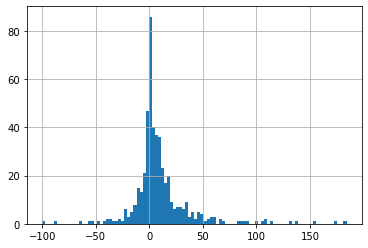

In [173]:
combined['retailarea_change'].loc[combined['retailarea_change']<200].hist(bins=100)

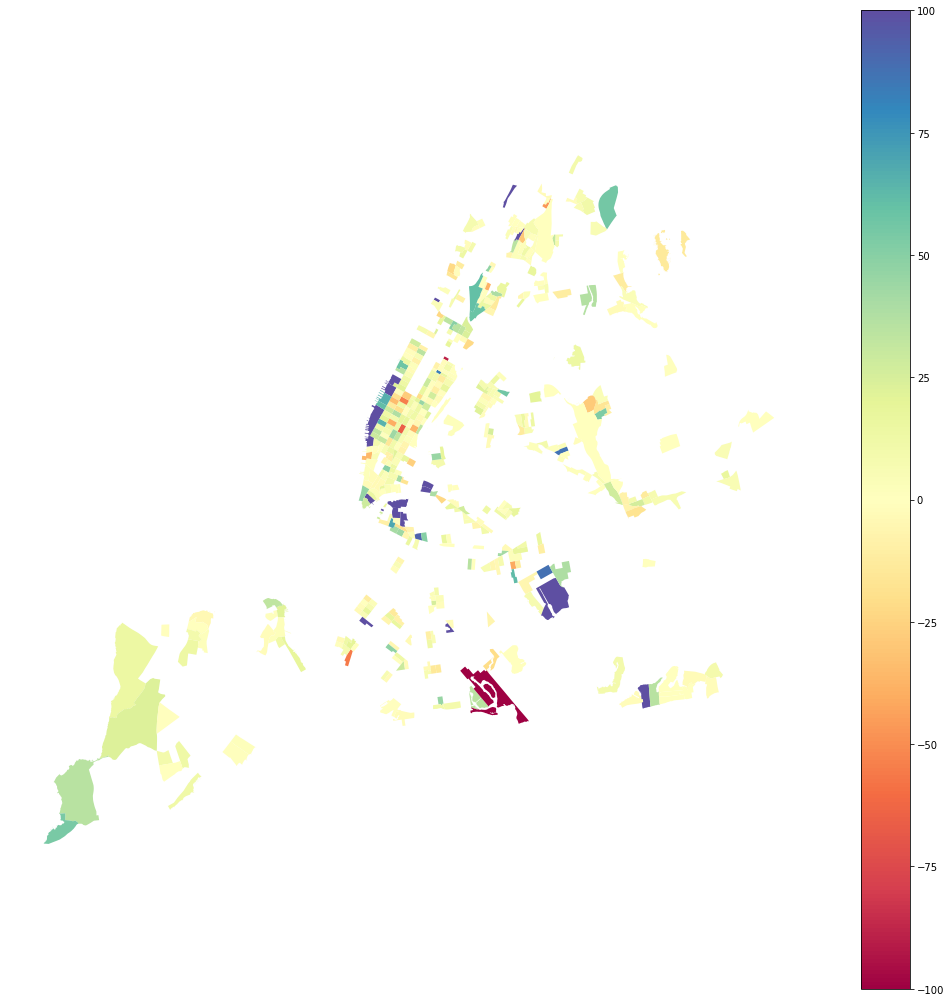

In [174]:
combined.plot(column='retailarea_change', legend=True, cmap='Spectral', vmax=100, figsize=(18, 18))
_ = plt.axis('off')

# Interactive Map

In [175]:
combined['folium_retailarea_change'] = combined['retailarea_change'].clip(-100, 100)

In [176]:
import requests
import os
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely import wkt
from shapely.geometry import Point
import matplotlib.pyplot as plt
import folium

In [177]:

style_fnc = lambda x: {'fillColor': '#ffffff',
                       'color':'#000000',
                       'fillOpacity': 0.1,
                       'weight': 0.1}
highlight_fnc = lambda x: {'fillColor': '#000000',
                           'color':'#000000',
                           'fillOpacity': 0.50,
                           'weight': 0.1}

In [178]:
x = combined.centroid.x.mean()
y = combined.centroid.y.mean()
f_map = folium.Map(location=[y, x], zoom_start=11, tiles='cartodbpositron')

#改底图https://python-visualization.github.io/folium/

<ipython-input-178-2c01e7c9f156>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x = combined.centroid.x.mean()
<ipython-input-178-2c01e7c9f156>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y = combined.centroid.y.mean()


In [179]:
folium.Choropleth(
    geo_data=combined,
    data=combined,
    columns=['GEOID', 'folium_retailarea_change'],
    key_on='feature.properties.GEOID',
    fill_color='RdYlBu',
    fill_opacity=0.8,
    line_opacity=0.05,
    nan_fill_color='white',
    nan_fill_opacity=0,
    legend_name='Percentage change of retail area (%)',
    bins=[-100,-80,-60,-40,-20,0., 20, 40, 60, 80, 100]
).add_to(f_map)

In [181]:
interact = folium.features.GeoJson(
    combined,
    style_function=style_fnc,
    control=False,
    highlight_function=highlight_fnc,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['GEOID', 'folium_retailarea_change'],
        aliases=['Census Tract: ','Percentage change of retail area (%): '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
    )
)
f_map.add_child(interact)
f_map.keep_in_front(interact)
folium.LayerControl().add_to(f_map)
f_map

In [182]:
#f_map.save("map3_retailarea_change.html")

# OLS Regression

In [218]:
path = '/Users/Kahty/Location Research/data/rtlchange_tract/rtlchange.shp'
gdf = gpd.read_file(path)

In [230]:
combined2

GEOID  bldgarea  retailarea  resarea  BldgArea  RetailArea  \
10    36005002800   3112274       78565  2571226   3106565       78565   
19    36005004200   3733621      499393  2838032   3735834      564967   
20    36005004300   3295179      222631  2164574   3095940      236448   
23    36005004800   1460166       69079  1155167   1465566       64574   
25    36005005002   1893097      138032  1699794   1897201      133839   
...           ...       ...         ...      ...       ...         ...   
2138  36085024800   3100745      389899  2355295   3296739      252654   
2139  36085025100   3162135       85055  2570472   3222933       74946   
2142  36085027702   6445876     2451231  3213125   6098569     2466914   
2147  36085029102   3608354      514662  1305279   3315518      448526   
2152  36085031901   1259087      256936   993523   1289101      258599   

      ResArea  retailarea_change   c  
10    2595213           0.000000   1  
19    2838232         -11.606696   3  
20    2009545          -5.843568  37  
23    1191767           6.976492   9  
25    1723531           3.132869  34  
...       ...                ...  ..  
2138  2661082          54.321325  25  
2139  2782880          13.488378   5  
2142  2915653          -0.635734  39  
2147  1397244          14.745188   7  
2152  1023759          -0.643081   2  

[489 rows x 9 columns]

In [231]:
temp = gdf.merge(combined2, left_on='GEOID', right_on='GEOID')
combined = temp
combined

OBJECTID CTLabel  BoroCode   BoroName  CT2010 BoroCT2010 CDEligibil  \
0           2      98         1  Manhattan    9800    1009800          I   
1           3     102         1  Manhattan   10200    1010200          I   
2           4     104         1  Manhattan   10400    1010400          I   
3           5     113         1  Manhattan   11300    1011300          I   
4           6  114.02         1  Manhattan   11402    1011402          I   
..        ...     ...       ...        ...     ...        ...        ...   
484      2148     151         1  Manhattan   15100    1015100          I   
485      2161      48         1  Manhattan    4800    1004800          I   
486      2163  508.01         3   Brooklyn   50801    3050801          E   
487      2164     157         1  Manhattan   15700    1015700          I   
488      2165     159         1  Manhattan   15900    1015900          I   

    NTACode                        NTAName  PUMA  ...  density_ch  \
0      MN19        Turtle Bay-East Midtown  3808  ...  -37.788985   
1      MN17          Midtown-Midtown South  3807  ...   55.348085   
2      MN17          Midtown-Midtown South  3807  ...  -32.581230   
3      MN17          Midtown-Midtown South  3807  ...   25.339674   
4      MN40  Upper East Side-Carnegie Hill  3805  ...  -25.384832   
..      ...                            ...   ...  ...         ...   
484    MN14                 Lincoln Square  3806  ...   22.094535   
485    MN21                       Gramercy  3808  ...  -25.598852   
486    BK42                       Flatbush  4015  ...  -57.504643   
487    MN14                 Lincoln Square  3806  ...  -23.937766   
488    MN14                 Lincoln Square  3806  ...  -28.320565   

                                              geometry  bldgarea  retailarea  \
0    POLYGON ((-73.96433 40.75639, -73.96479 40.755...   8980231      493267   
1    POLYGON ((-73.97124 40.76094, -73.97170 40.760...  17706207     1695023   
2    POLYGON ((-73.97446 40.76230, -73.97492 40.761...  21323382     1208918   
3    POLYGON ((-73.98412 40.75485, -73.98460 40.754...  20008339     1398617   
4    POLYGON ((-73.96476 40.76407, -73.96521 40.763...   5402082     1189996   
..                                                 ...       ...         ...   
484  POLYGON ((-73.98441 40.77482, -73.98488 40.774...  11879374      309786   
485  POLYGON ((-73.98021 40.73439, -73.98038 40.734...   5330633      167222   
486  POLYGON ((-73.95871 40.65040, -73.95998 40.650...   1865092      174550   
487  POLYGON ((-73.97500 40.77754, -73.97546 40.776...   8278887      334042   
488  POLYGON ((-73.98068 40.77993, -73.98114 40.779...   7878673      284300   

     resarea  BldgArea  RetailArea  ResArea  retailarea_change    c  
0    5235957   9301309      490199  5689912           0.625868   74  
1     486901  18873185     1635519   465216           3.638233   98  
2    5186292  18006904     1080754   877664          11.858758  110  
3      67441  23032890     1017038    65845          37.518657   49  
4    2859288   5321384     1175061  2836379           1.270998   69  
..       ...       ...         ...      ...                ...  ...  
484  9044121   5920355       81474  4502859         280.226821   18  
485  3335111   5276540      179870  3623285          -7.031745   72  
486  1601779   1861682      168252  1600901           3.743195    3  
487  7404811   8249137      317214  7452236           5.304936   94  
488  6825523   7881678      209827  6967372          35.492572   41  

[489 rows x 26 columns]

In [235]:
combined = combined.rename(columns={'density_ch': 'retail density_change%'})
combined = combined.rename(columns={'count_chan': 'retail number_change%'})
combined = combined.rename(columns={'retailarea_change': 'retail area_change%'})

In [236]:
combined.drop(combined[combined['retail number_change%'] >100 ].index, inplace=True)
combined.drop(combined[combined['retail area_change%'] >200 ].index, inplace=True)

In [237]:
import os
import pandas as pd
import numpy as np
from sodapy import Socrata
import plotly.express as px
import plotly.graph_objects as go

In [238]:
fig=go.Figure()

fig=px.scatter(combined, x='retail area_change%', y='retail number_change%',trendline="ols",color="BoroName")

fig.update_layout(
    title='Linear Regression Between Retail Area Change & Retail Number Change, by Census Tract, 2009 & 2017',
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font_color ='white',
     xaxis=dict(
        title='retail area change (%)'),
    yaxis=dict(
        title='retail number change (%)')
)


fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)

fig.show()

In [243]:
#fig.write_html("regression_number_area.html")

In [240]:
combined.drop(combined[combined['retail density_change%'] >100 ].index, inplace=True)
combined.drop(combined[combined['retail area_change%'] >200 ].index, inplace=True)

In [241]:
fig=go.Figure()

fig=px.scatter(combined, x='retail area_change%', y='retail density_change%',trendline="ols",color="BoroName")

fig.update_layout(
    title='Linear Regression Between Retail Area Change & Retail Percap Density Change, by Census Tract, 2009 & 2017',
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font_color ='white',
     xaxis=dict(
        title='retail area change (%)'),
    yaxis=dict(
        title='retail percap density change (%)')
)


fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)

fig.show()

In [242]:
#fig.write_html("regression_density_area.html")

# Caculate 2: The Change of Zoning Area

In [64]:
ct_pluto09['ZoneDist1']

0           R3A
1           R3A
2           R3A
3           R3A
4           R3A
          ...  
855001    C4-6A
855002      R8B
855003    C4-6A
855004      R8B
855005    C4-6A
Name: ZoneDist1, Length: 855006, dtype: object

In [65]:
ct_pluto09.groupby(['ZoneDist1']).count()

OBJECTID  CTLabel  BoroCode_l  BoroName  CT2010  BoroCT2010  \
ZoneDist1                                                                
BPC              41       41          41        41      41          41   
C1-6            457      457         457       457     457         457   
C1-6A           322      322         322       322     322         322   
C1-7             68       68          68        68      68          68   
C1-7A           100      100         100       100     100         100   
...             ...      ...         ...       ...     ...         ...   
R8B            7260     7260        7260      7260    7260        7260   
R8X             122      122         122       122     122         122   
R9              100      100         100       100     100         100   
R9A             123      123         123       123     123         123   
R9X              54       54          54        54      54          54   

           CDEligibil  NTACode  NTAName  PUMA  ...  EDesigNum  APPBBL  \
ZoneDist1                                      ...                      
BPC                41       41       41    41  ...          0      41   
C1-6              457      457      457   457  ...          0     457   
C1-6A             322      322      322   322  ...          0     322   
C1-7               68       68       68    68  ...          0      68   
C1-7A             100      100      100   100  ...         23     100   
...               ...      ...      ...   ...  ...        ...     ...   
R8B              7260     7260     7260  7260  ...        210    7260   
R8X               122      122      122   122  ...          0     122   
R9                100      100      100   100  ...          2     100   
R9A               123      123      123   123  ...         26     123   
R9X                54       54       54    54  ...          0      54   

           APPDate  PLUTOMapID  Version  MAPPLUTO_F  SHAPE_Leng  SHAPE_Area  \
ZoneDist1                                                                     
BPC             36          41       41          41          41          41   
C1-6            31         457      457         457         457         457   
C1-6A           20         322      322         322         322         322   
C1-7             8          68       68          68          68          68   
C1-7A            9         100      100         100         100         100   
...            ...         ...      ...         ...         ...         ...   
R8B            341        7260     7260        7260        7260        7260   
R8X             12         122      122         122         122         122   
R9               9         100      100         100         100         100   
R9A             12         123      123         123         123         123   
R9X              0          54       54          54          54          54   

           pluto_year  geometry  
ZoneDist1                        
BPC                41        41  
C1-6              457       457  
C1-6A             322       322  
C1-7               68        68  
C1-7A             100       100  
...               ...       ...  
R8B              7260      7260  
R8X               122       122  
R9                100       100  
R9A               123       123  
R9X                54        54  

[153 rows x 98 columns]

In [66]:
ct_pluto09.groupby(['ZoneDist2']).count()

OBJECTID  CTLabel  BoroCode_l  BoroName  CT2010  BoroCT2010  \
ZoneDist2                                                                
C1-6             65       65          65        65      65          65   
C1-6A            20       20          20        20      20          20   
C1-7             14       14          14        14      14          14   
C1-7A             5        5           5         5       5           5   
C1-8              4        4           4         4       4           4   
...             ...      ...         ...       ...     ...         ...   
R8B             844      844         844       844     844         844   
R8X              20       20          20        20      20          20   
R9               12       12          12        12      12          12   
R9A              21       21          21        21      21          21   
R9X               9        9           9         9       9           9   

           CDEligibil  NTACode  NTAName  PUMA  ...  EDesigNum  APPBBL  \
ZoneDist2                                      ...                      
C1-6               65       65       65    65  ...          0      65   
C1-6A              20       20       20    20  ...          1      20   
C1-7               14       14       14    14  ...          0      14   
C1-7A               5        5        5     5  ...          1       5   
C1-8                4        4        4     4  ...          0       4   
...               ...      ...      ...   ...  ...        ...     ...   
R8B               844      844      844   844  ...         18     844   
R8X                20       20       20    20  ...          1      20   
R9                 12       12       12    12  ...          1      12   
R9A                21       21       21    21  ...          1      21   
R9X                 9        9        9     9  ...          0       9   

           APPDate  PLUTOMapID  Version  MAPPLUTO_F  SHAPE_Leng  SHAPE_Area  \
ZoneDist2                                                                     
C1-6             2          65       65          65          65          65   
C1-6A            4          20       20          20          20          20   
C1-7             1          14       14          14          14          14   
C1-7A            0           5        5           5           5           5   
C1-8             1           4        4           4           4           4   
...            ...         ...      ...         ...         ...         ...   
R8B            106         844      844         844         844         844   
R8X              9          20       20          20          20          20   
R9               4          12       12          12          12          12   
R9A              0          21       21          21          21          21   
R9X              0           9        9           9           9           9   

           pluto_year  geometry  
ZoneDist2                        
C1-6               65        65  
C1-6A              20        20  
C1-7               14        14  
C1-7A               5         5  
C1-8                4         4  
...               ...       ...  
R8B               844       844  
R8X                20        20  
R9                 12        12  
R9A                21        21  
R9X                 9         9  

[133 rows x 98 columns]

In [67]:
zone09 = ct_pluto09[(ct_pluto09['ZoneDist1'].str.contains('C')==True) & (ct_pluto09['ZoneDist1'].str.contains('C8')==False) & (ct_pluto09['ZoneDist1'].str.contains('C7')==False)& (ct_pluto09['ZoneDist1'].str.contains('C8')==False) & (ct_pluto09['ZoneDist1'].str.contains('BPC')==False)]

In [68]:
newzone09 = []
for x in list(zone09['ZoneDist1']):
    newzone09.append(x[0:2])
zone09['ZoneDist1']=newzone09
zone09['ZoneDist1']

C:\Users\Kahty\anaconda3\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


365       C1
368       C1
370       C1
372       C1
374       C1
          ..
854911    C4
854998    C4
855001    C4
855003    C4
855005    C4
Name: ZoneDist1, Length: 20782, dtype: object

In [69]:
czone09 = zone09[['BoroName', 'LotArea','ZoneDist1']].groupby(['BoroName','ZoneDist1']).sum()
czone09 = czone09.rename(columns={'LotArea': 'LotArea09'})
czone09

LotArea09
BoroName      ZoneDist1           
Bronx         C3           1363637
              C4          15846365
              C6            543705
Brooklyn      C3            774981
              C4          17720820
              C5           1304164
              C6           5146538
Manhattan     C1          12669524
              C2           4678086
              C4          10309462
              C5          20320064
              C6          41481360
Queens        C3            821501
              C4          23428713
              C5            212003
              C6           2365977
Staten Island C3           1401398
              C4          18321210

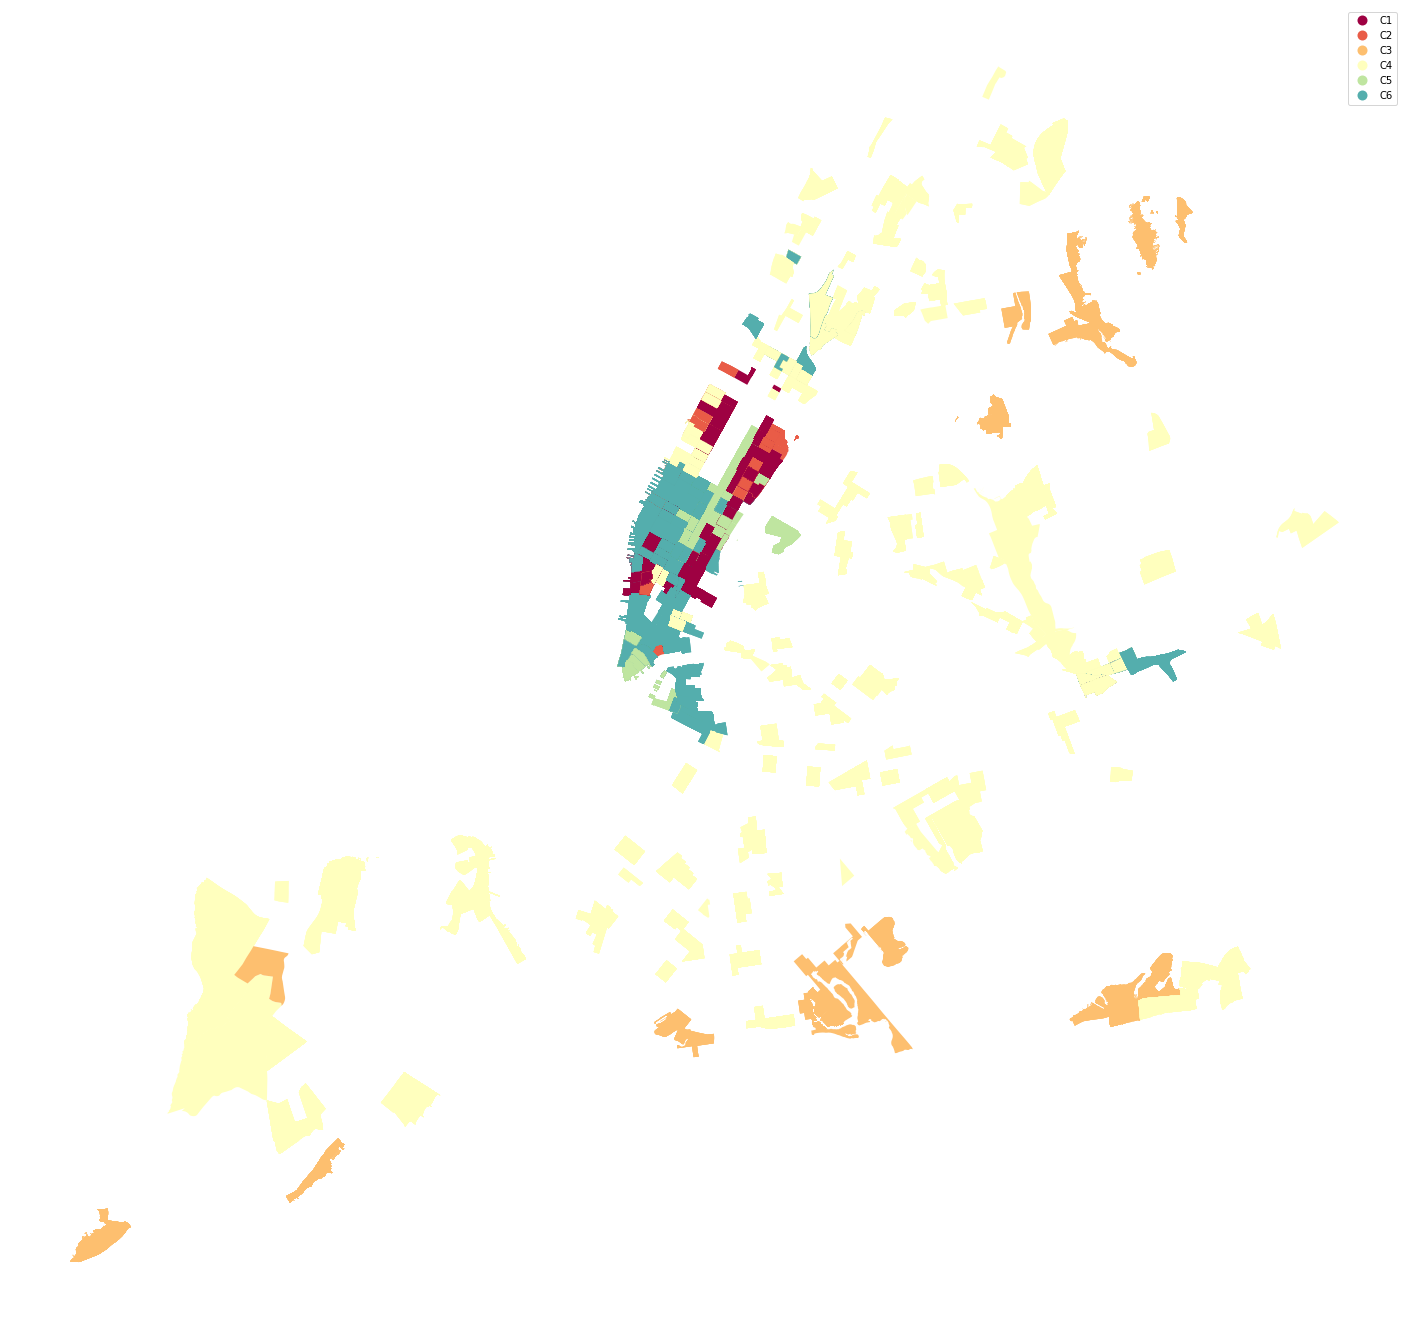

In [244]:
zone09.plot(column='ZoneDist1', legend=True, cmap='Spectral', vmax=6, figsize=(25, 25))
_ = plt.axis('off')

In [71]:
zone17 = ct_pluto17[(ct_pluto17['ZoneDist1'].str.contains('C')==True) & (ct_pluto17['ZoneDist1'].str.contains('C8')==False) & (ct_pluto17['ZoneDist1'].str.contains('C7')==False)& (ct_pluto17['ZoneDist1'].str.contains('C8')==False) & (ct_pluto17['ZoneDist1'].str.contains('BPC')==False)]

In [72]:
newzone17 = []
for x in list(zone17['ZoneDist1']):
    newzone17.append(x[0:2])
zone17['ZoneDist1']=newzone17

C:\Users\Kahty\anaconda3\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [73]:
czone17 = zone17[['BoroName', 'LotArea','ZoneDist1']].groupby(['BoroName','ZoneDist1']).sum()
czone17 = czone17.rename(columns={'LotArea': 'LotArea17'})
czone17

LotArea17
BoroName      ZoneDist1           
Bronx         C3           1596186
              C4          18083857
              C6           1050279
Brooklyn      C3            759773
              C4          20770882
              C5           1328261
              C6           5097306
Manhattan     C1          13708025
              C2           4594050
              C4          11073848
              C5          20618750
              C6          44405853
Queens        C2            144678
              C3           3046413
              C4          25225741
              C5            211917
              C6           2357162
Staten Island C3           1345400
              C4          19930087

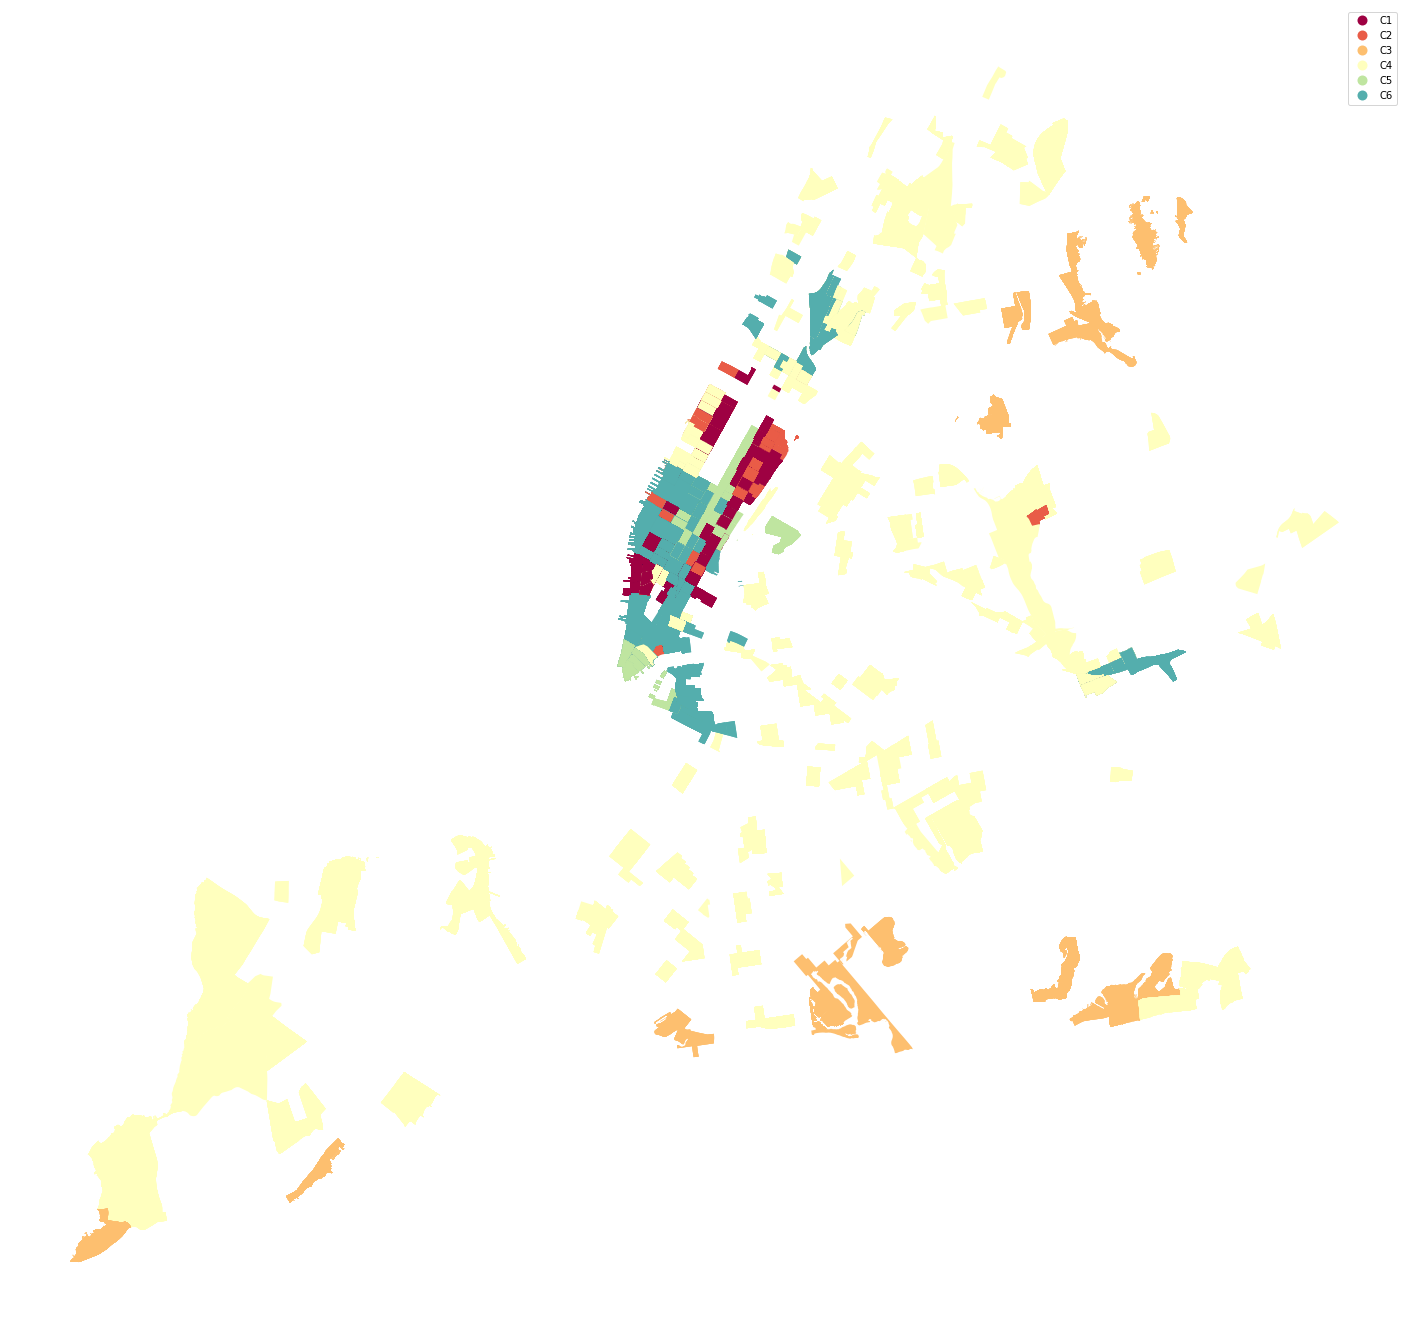

In [245]:
zone17.plot(column='ZoneDist1', legend=True, cmap='Spectral', vmax=6, figsize=(25, 25))
_ = plt.axis('off')

In [75]:
merged = czone17.merge(czone09, left_index=True, right_index=True)
merged

LotArea17  LotArea09
BoroName      ZoneDist1                      
Bronx         C3           1596186    1363637
              C4          18083857   15846365
              C6           1050279     543705
Brooklyn      C3            759773     774981
              C4          20770882   17720820
              C5           1328261    1304164
              C6           5097306    5146538
Manhattan     C1          13708025   12669524
              C2           4594050    4678086
              C4          11073848   10309462
              C5          20618750   20320064
              C6          44405853   41481360
Queens        C3           3046413     821501
              C4          25225741   23428713
              C5            211917     212003
              C6           2357162    2365977
Staten Island C3           1345400    1401398
              C4          19930087   18321210

In [76]:
merged['zoning_change%']=(merged['LotArea17']-merged['LotArea09'])/merged['LotArea09']*100
merged

LotArea17  LotArea09  zoning_change%
BoroName      ZoneDist1                                      
Bronx         C3           1596186    1363637       17.053585
              C4          18083857   15846365       14.119907
              C6           1050279     543705       93.170745
Brooklyn      C3            759773     774981       -1.962371
              C4          20770882   17720820       17.211743
              C5           1328261    1304164        1.847697
              C6           5097306    5146538       -0.956604
Manhattan     C1          13708025   12669524        8.196843
              C2           4594050    4678086       -1.796376
              C4          11073848   10309462        7.414412
              C5          20618750   20320064        1.469907
              C6          44405853   41481360        7.050138
Queens        C3           3046413     821501      270.834972
              C4          25225741   23428713        7.670195
              C5            211917     212003       -0.040565
              C6           2357162    2365977       -0.372573
Staten Island C3           1345400    1401398       -3.995867
              C4          19930087   18321210        8.781500